In [32]:
# 1️⃣ Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [35]:
# 2. load Dataset
df = pd.read_csv("covid_19_clean_complete.csv")
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [38]:
# 3 Basic Dataset Understanding
print("Shape:", df.shape)
print("\nInfo:")
df.info()


print("\nDescribe:")
print(df.describe())

Shape: (49068, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB

Describe:
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24

In [39]:
# 4 Check Column Names
print("\nColumns:")
print(df.columns)


Columns:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [43]:
# 5 Rename Columns
df.rename(columns={
    'Country/Region': 'Country',
    'Confirmed': 'Confirmed_Cases',
    'Deaths': 'Deaths',
    'Recovered': 'Recovered',
    'Active' : 'Active_Cases'
}, inplace=True)

In [44]:
# 6 Date Conversion
df['Date'] = pd.to_datetime(df['Date'])

In [47]:
# 7 Missing Values Handling
print("\nMissing values:")
print(df.isnull().sum())

df.fillna(0, inplace=True)


Missing values:
Province/State     34404
Country                0
Lat                    0
Long                   0
Date                   0
Confirmed_Cases        0
Deaths                 0
Recovered              0
Active_Cases           0
WHO Region             0
dtype: int64


In [52]:
# Exploratory Data Analysis
#--------------------------------------
# 8 Global COVID Summary
global_summary = df[['Confirmed_Cases','Deaths','Recovered','Active_Cases']].sum()
print("\nGlobal Summary:")
print(global_summary)


Global Summary:
Confirmed_Cases    828508482
Deaths              43384903
Recovered          388408229
Active_Cases       396715350
dtype: int64


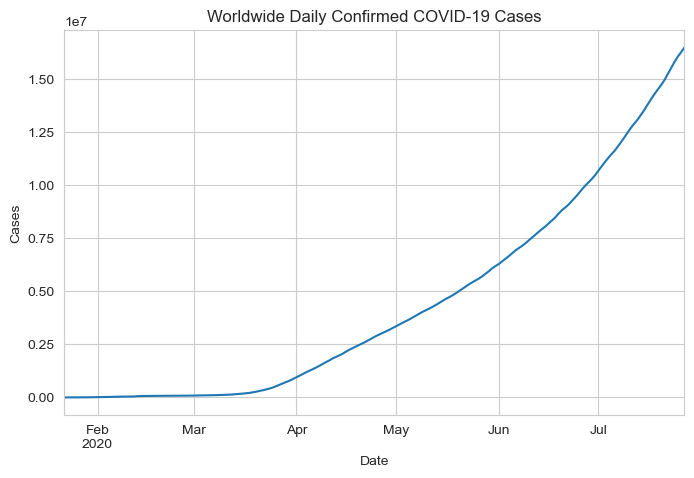

In [54]:
# 9 Daily Confirmed Cases (Worldwide)
daily_cases = df.groupby('Date')['Confirmed_Cases'].sum()

daily_cases.plot()
plt.title("Worldwide Daily Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()

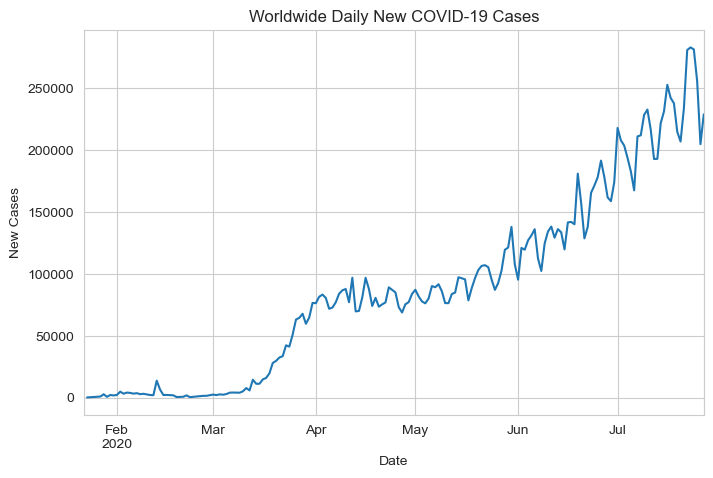

In [55]:
# 10 Daily New Cases
daily_new_cases = daily_cases.diff()

daily_new_cases.plot()
plt.title("Worldwide Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

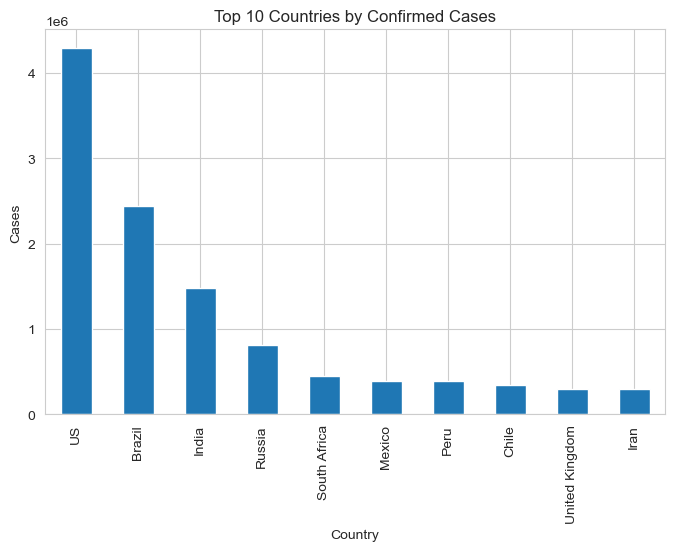

In [56]:
# 11 Top 10 Countries by Confirmed Cases
top_countries = (
    df.groupby('Country')['Confirmed_Cases']
    .max()
    .sort_values(ascending=False)
    .head(10)
)
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Confirmed Cases")
plt.ylabel("Cases")
plt.show()

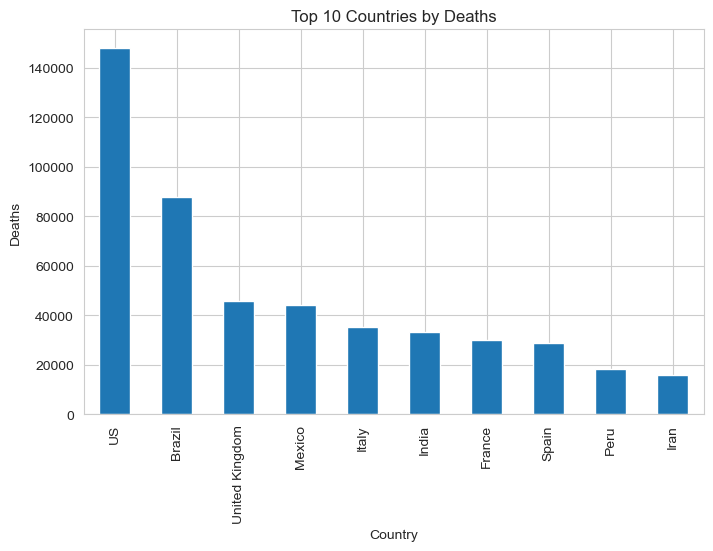

In [58]:
# 12 Top 10 Countries by Deaths
top_deaths = (
    df.groupby('Country')['Deaths']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

top_deaths.plot(kind='bar')
plt.title("Top 10 Countries by Deaths")
plt.ylabel("Deaths")
plt.show()

In [62]:
# 13 Death Rate Analysis
df['Death_Rate'] = np.where(
    df['Confirmed_Cases'] > 0,
    (df['Deaths'] / df['Confirmed_Cases']) * 100,
    0
)

print("\nTop 10 Countries by Death Rate:")
print(
    df.groupby('Country')['Death_Rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


Top 10 Countries by Death Rate:
Country
Yemen          11.184522
Sudan          10.357696
Philippines    10.345289
Italy          10.119833
Belgium         9.681450
Guyana          8.388045
Nicaragua       8.065478
Hungary         7.886331
Spain           7.670844
Bahamas         7.120975
Name: Death_Rate, dtype: float64


In [66]:
# 14 Recovery Rate Analysis
df['Recovery_Rate'] = np.where(
    df['Confirmed_Cases'] > 0,
    (df['Recovered'] / df['Confirmed_Cases']) * 100,
    0
)
print("\nTop 10 Countries by Recovery Rate:")
print(
    df.groupby('Country')['Recovery_Rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


Top 10 Countries by Recovery Rate:
Country
China            75.062075
Cambodia         70.416266
Thailand         67.041067
Vietnam          66.566557
Liechtenstein    63.582219
Greenland        60.655665
South Korea      58.386514
Brunei           58.105005
Malaysia         58.006278
Australia        56.966356
Name: Recovery_Rate, dtype: float64


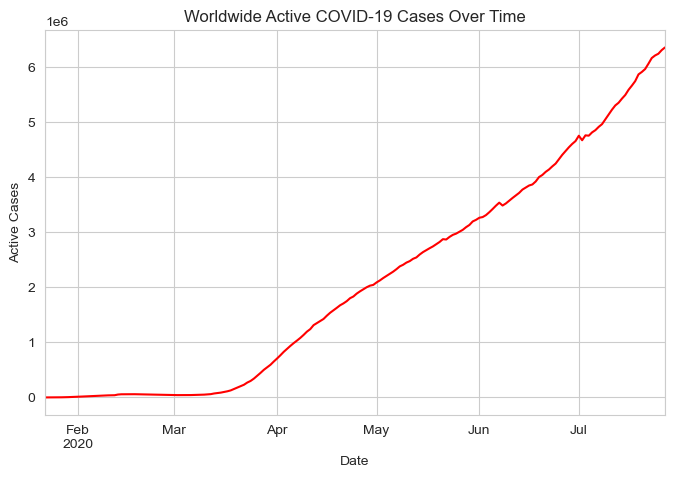

In [67]:
# 15 Active Cases Trend
active_cases = df.groupby('Date')['Active_Cases'].sum()

active_cases.plot(color='red')
plt.title("Worldwide Active COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()

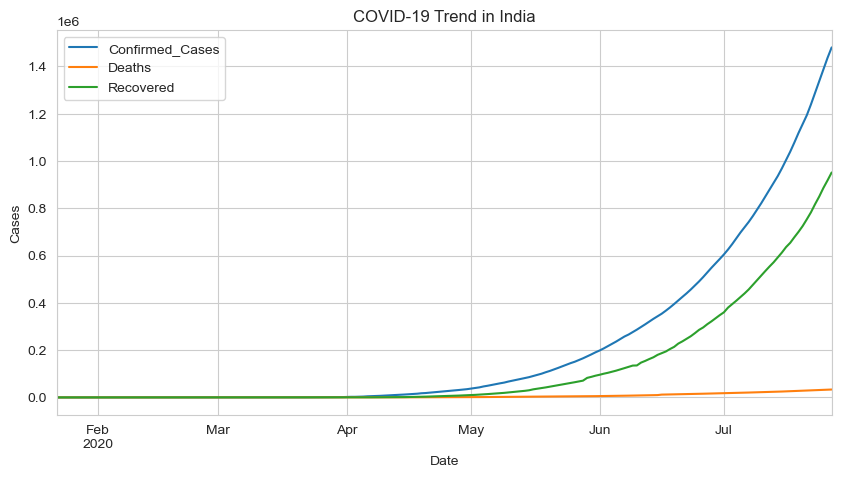

In [68]:
# 16 Country-wise Trend (india)
india = df[df['Country'] == 'India']

india.plot(
    x='Date',
    y=['Confirmed_Cases', 'Deaths', 'Recovered'],
    figsize=(10,5)
)
plt.title("COVID-19 Trend in India")
plt.ylabel("Cases")
plt.show()

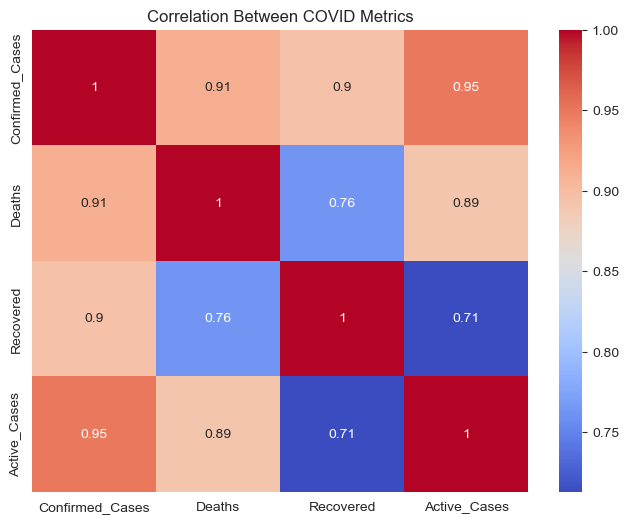

In [70]:
# 17 Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Confirmed_Cases','Deaths','Recovered','Active_Cases']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between COVID Metrics")
plt.show()

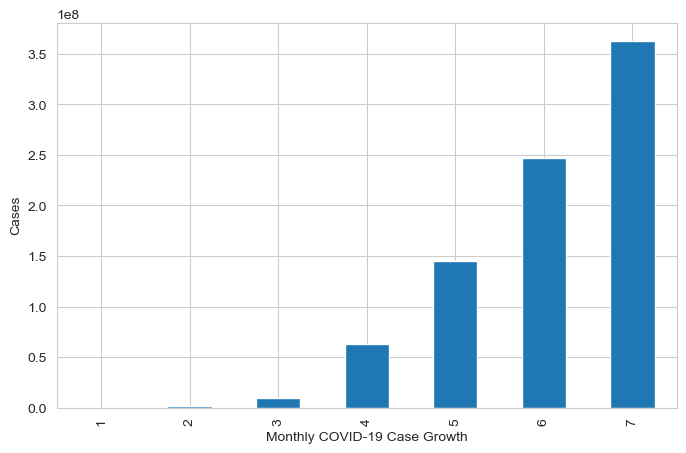

In [71]:
# 18 Monthly Growth Analysis
df['Month'] = df['Date'].dt.month

momthly_cases = df.groupby('Month')['Confirmed_Cases'].sum()

monthly_cases.plot(kind='bar')
plt.xlabel("Monthly COVID-19 Case Growth")
plt.ylabel("Cases")
plt.show()

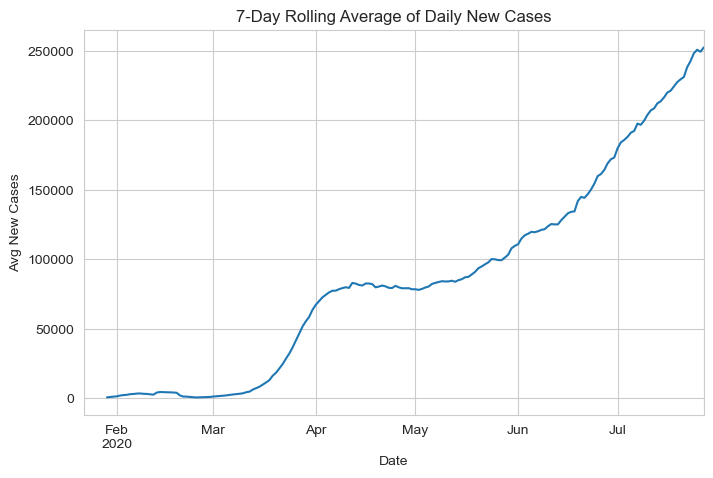

In [72]:
# 19 7-Day Rolling Average (Advanced)
rolling_avg = daily_new_cases.rolling(window=7).mean()

rolling_avg.plot()
plt.title("7-Day Rolling Average of Daily New Cases")
plt.xlabel("Date")
plt.ylabel("Avg New Cases")
plt.show()